#Clasificación


In [1]:
#Para obtener el conjunto de datos de MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)


In [2]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

In [3]:
y.shape

(70000,)

Hay 70.000 imágenes y cada imagen tiene 784 características. Esto se debe a que cada imagen tiene 28 × 28 píxeles, y cada característica simplemente representa la intensidad de un píxel, de 0 (blanco) a 255 (negro). Echemos un vistazo a un dígito del conjunto de datos. Todo lo que necesitamos hacer es tomar el vector de características de una instancia, remodelarlo a una matriz de 28 × 28 y mostrarlo usando la función imshow() de Matplotlib:

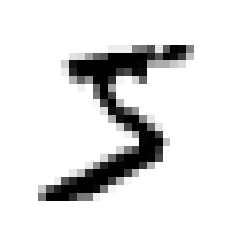

In [4]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000],y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == '5')
y_test_5= (y_test == '5')

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Ahora podemos usarlo para detectar imágenes del número 5:


In [8]:
sgd_clf.predict([some_digit])

array([ True])

##Medidas de desempeño
###Medición de la precisión mediante validación cruzada

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #Imprime false

False


In [11]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

¡Tiene más del 90% de precisión! Esto se debe simplemente a que solo alrededor del 10 % de las imágenes son 5, por lo que si siempre adivina que una imagen no es un 5, acertará aproximadamente el 90 % de las veces. 

Esto demuestra por qué la precisión generalmente no es la medida de rendimiento preferida para los clasificadores, especialmente cuando se trata de conjuntos de datos sesgados (es decir, cuando algunas clases son mucho más frecuentes que otras). Una forma mucho mejor de evaluar el rendimiento de un clasificador es observar la **matriz de confusión .**

##Matriz de confusión
La idea general de una matriz de confusión es contar el número de veces que las instancias de la clase A se clasifican como clase B, para todos los pares A/B. Por ejemplo, para saber la cantidad de veces que el clasificador confundió imágenes de 8 con 0, miraría la fila n.° 8, columna n.° 0 de la matriz de confusión.

Para calcular la matriz de confusión, primero debe tener un conjunto de predicciones para poder compararlas con los objetivos reales

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Ahora estamos preparados para obtener la matriz de confusión usando la función `confusion_matrix()` Simplemente le pasamos las clases objetivo ( `y_train_5`) y las clases predichas ( `y_train_pred`):

In [13]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_train_5, y_train_pred)
cm


array([[53892,   687],
       [ 1891,  3530]])

Cada fila en una matriz de confusión representa una **clase real** , mientras que cada columna representa una clase predicha . La primera fila de esta matriz considera imágenes que no son 5 (la clase negativa ): 53.892 de ellas se clasificaron correctamente como que no son 5 (se denominan **negativos verdaderos **), mientras que las 687 restantes se clasificaron incorrectamente como 5 ( falsos positivos , también llamados *errores tipo I *). La segunda fila considera las imágenes de 5s (la clase positiva ): 1891 fueron clasificadas incorrectamente como no 5s ( falsos negativos , también llamados **errores tipo II **), mientras que las 3530 restantes fueron clasificadas correctamente como 5s ( verdaderos positivos ).). Un clasificador perfecto solo tendría verdaderos positivos y verdaderos negativos, por lo que su matriz de confusión tendría valores distintos de cero solo en su diagonal principal (de arriba a la izquierda a abajo a la derecha):

In [14]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Precisión del clasificador
precisión= TP/TP+FP
Recuperación, sensibilidad o tasa de verdaderos positivos:
recall = TP/TP+FN
Nota: FP:Falsos positivos, FN: Falsos negativos

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

F1=TP/TP +FN+FP/2


In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [17]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([2164.22030239])

In [18]:
threshold =0
y_some_digit_pred = (y_scores > threshold)

In [19]:
thresold = 3000
y_some_digit_pred =(y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresolds= precision_recall_curve(y_train_5, y_scores)

<function matplotlib.pyplot.show>

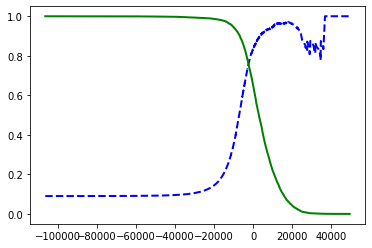

In [22]:
plt.plot(thresolds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresolds, recalls[:-1], "g-", label="Recall", linewidth=2)
[...]
plt.show

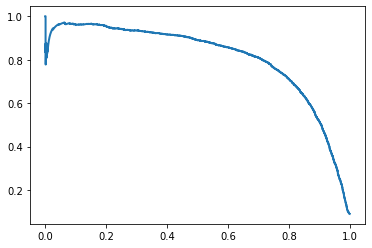

In [23]:
plt.plot(recalls, precisions, linewidth=2, label="curva de Precision/recall ")
plt.show()

In [24]:
idx_for_90_precision =(precisions >= 0.90).argmax()
thresold_for_90_precision=thresolds[idx_for_90_precision]
thresold_for_90_precision

3370.0194991439557

In [25]:
y_train_pre_90 =(y_scores >= thresold_for_90_precision)

#La curva ROC
La **curva característica operativa del receptor (ROC)**es otra herramienta común utilizada con clasificadores binarios. Es muy similar a la curva de precisión/recuperación, pero en lugar de trazar precisión versus recuperación, la curva ROC representa la tasa de verdaderos positivos (otro nombre para recuperación) contra la tasa de falsos positivos (FPR). FPR (también llamado caída ) es la proporción de instancias negativas que se clasifican incorrectamente como positivas. Es igual a 1: la tasa negativa verdadera (TNR), que es la proporción de instancias negativas que se clasifican correctamente como negativas. La TNR también se llama** especificidad** . Por lo tanto, la curva ROC traza la sensibilidad (recordatorio) frente a 1 – especificidad .

Para trazar la curva ROC, primero usa la función `roc_curve()` para calcular el TPR y el FPR para varios valores de umbral:

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr,thresolds = roc_curve(y_train_5, y_scores)

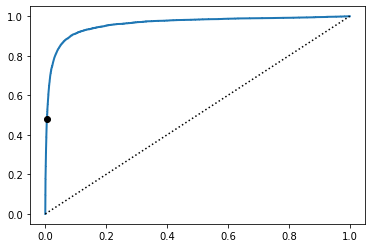

In [27]:
idx_for_thresold_at_90 =(thresolds <=thresold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_thresold_at_90], fpr[idx_for_thresold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="Curva ROC")
plt.plot([0,1], [0,1], 'k:', label=" random classifier")
plt.plot([fpr_90], [tpr_90], "ko", label=" para precision 90%")
[...]
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [30]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [31]:
roc_auc_score(y_train_5, y_scores_forest)


NameError: ignored

# Clasificación multiclase
Mientras los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales ) pueden distinguir entre más de dos clases.
Algunos clasificadores de Scikit-Learn, como `LogisticRegression`, `RandomForestClassifiery` `GaussianNB`, son capaces de manejar varias clases de forma nativa. Otros, como `SGDClassifiero` `SVC`, son clasificadores estrictamente binarios. 
Una forma de crear un sistema que pueda clasificar las imágenes de dígitos en 10 clases (del 0 al 9) es entrenar 10 clasificadores binarios, uno para cada dígito (un detector 0, un detector 1, un detector 2, etc.). sobre). Luego, cuando desea clasificar una imagen, obtiene el puntaje de decisión de cada clasificador para esa imagen y selecciona la clase cuyo clasificador genera el puntaje más alto. Estese denomina estrategia **uno contra el resto (OvR) (también llamada uno contra todos )**
Otra estrategia es entrenar un clasificador binario para cada par de dígitos: uno para distinguir 0s y 1s, otro para distinguir 0s y 2s, otro para 1s y 2s, y así sucesivamente. Esto se llama la estrategia uno contra uno (OvO). Si hay N clases, necesita entrenar N × ( N – 1) / 2 clasificadores. 
Scikit-Learn detecta cuando intenta utilizar un algoritmo de clasificación binaria para una tarea de clasificación multiclase y automáticamente ejecuta OvR u OvO, según el algoritmo


In [32]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [33]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [34]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [35]:
class_id = some_digit_scores.argmax()
class_id

5

In [36]:
#Para buscar las etiquetas de las clases:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [37]:
svm_clf.classes_[class_id]

'5'

Si queremos forzar a Scikit-Learn a usar uno contra uno o uno contra el resto, podemos usar las clases `OneVsOneClassifier` o `OneVsRestClassifier`: simplemente crearemos una instancia y pasaremos un clasificador a su constructor (ni siquiera tiene que ser un clasificador binario).

In [38]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [39]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [40]:
len(ovr_clf.estimators_)

10

In [41]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
#El resultado es incorrecto!!!

array(['3'], dtype='<U1')

In [42]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train,cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

##Análisis de errores
Si este fuera un proyecto real, ahora  exploraríamos las opciones de preparación de datos, probaríamos varios modelos, preseleccionaríamos los mejores, ajustaríamos sus hiperparámetros usando `GridSearchCV` y automatizaríamos tanto como fuera posible. Aquí, asumiremos que hemos encontrado un modelo prometedor y deseamos encontrar formas de mejorarlo. Una forma de hacerlo es analizar los tipos de errores que comete.

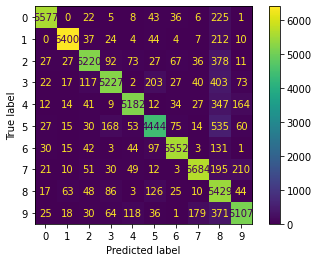

In [45]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
ConfusionMatrixDisplay. from_predictions(y_train, y_train_pred)
plt.show()

La mayoría de las imágenes están en la diagonal principal, lo que significa que se clasificaron correctamente.
La celda en la diagonal en la fila #5 y la columna #5 se ve un poco más oscura que los otros dígitos.

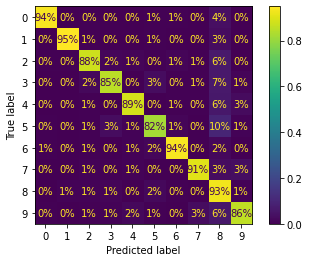

In [46]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
ConfusionMatrixDisplay. from_predictions(y_train, y_train_pred, normalize="true",values_format=".0%")
plt.show()





Ahora podemos ver fácilmente que solo el 82% de las imágenes de 5s se clasificaron correctamente. **El error más común que cometió el modelo con imágenes de 5s fue clasificarlas erróneamente como 8s**: esto sucedió en el 10 % de todos los 5s. Pero solo el 2% de los 8 se clasificaron erróneamente como 5: **¡las matrices de confusión generalmente no son simétricas! **
Si queremos que los errores se destaquen mucho más, puede intentar poner peso cero en las predicciones correctas:

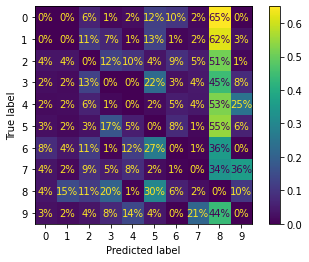

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,normalize="true", values_format=".0%")

Ahora podemos ver mucho más claramente los tipos de errores que comete el clasificador. La columna para la clase 8 ahora es realmente brillante, lo que confirma que muchas imágenes se clasificaron erróneamente como 8s. De hecho, esta es la clasificación errónea más común para casi todas las clases. Pero hay que tener cuidado con cómo interpreta los porcentajes en este diagrama: hemos excluido las predicciones correctas; por ejemplo, el 36 % en la fila n.º 7, columna n.º 9 no significa que el 36 % de todas las imágenes de 7 se clasificaron erróneamente como 9. Significa que el 36% de los errores que cometió el modelo en imágenes de 7s fueron clasificaciones erróneas como 9s.

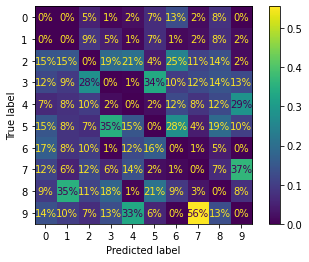

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,normalize="pred", values_format=".0%")

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
[...]  # plot all images in X_aa, X_ab, X_ba, X_bb in a confusion matrix style

[Ellipsis]

# Clasificación multilevel

In [47]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large =(y_train >='7')
y_train_odd =(y_train.astype('int8') % 2 ==1) 
y_multilabel = np.c_[y_train_large, y_train_odd] 
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_multilabel) 

KNeighborsClassifier()

El siguiente código calcula la puntuación F 1 promedio en todas las etiquetas:

In [48]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [49]:
from sklearn.multioutput import ClassifierChain 
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42) 
chain_clf.fit(X_train[:2000], y_multilabel[:2000]) # Utilizamos 2000 imágenes para acelerar el proceso

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

#Clasificación multisalida
 Es una generalización de la clasificación multietiqueta donde cada etiqueta puede ser multiclase (es decir, puede tener más de dos valores posibles).
 Comencemos por crear los conjuntos de entrenamiento y prueba tomando las imágenes MNIST y agregando ruido a sus intensidades de píxeles.con la función de NumPy randint(). Las imágenes de destino serán las imágenes originales:

In [50]:
np.random.seed(42) #para hacer este código reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise 
y_train_mod = X_train 
y_test_mod = X_test


<function matplotlib.pyplot.show>

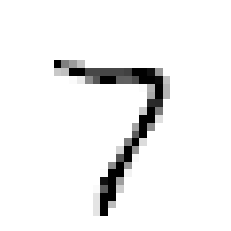

In [51]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]]) 
plot_digit(clean_digit)
plt.show